# 1.导入数据

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
#pandas读写csv的两个方法
#法一
# 每个列表表示csv文件里面的一列
# a = [1, 2, 3]
# b = [4, 5, 6]
# c = [7, 8, 9]
# # 字典中的key值就是csv中的列名
# csv_file = pd.DataFrame({'x': a, 'y': b, 'z': c})

#法二
df = pd.read_csv('customer_data_V3.csv')
df.head()

,ID,age,marital,income,house,business,property,debt,job,credit,relation,class
0,C001,5,5,3,3,1,12,10,7,0,3,1
1,C002,5,5,3,3,2,15,10,7,5,4,1
2,C003,5,5,5,3,2,12,7,7,4,4,1
3,C004,5,5,2,3,1,8,10,4,5,1,0
4,C005,5,5,3,3,1,8,7,7,4,1,0


In [17]:
df.describe()

,age,marital,income,house,business,property,debt,job,credit,relation,class
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,4.664815,4.322222,3.725926,2.887037,1.785185,11.088889,8.777778,6.400000,3.931481,2.059259,0.533333
std,0.731394,1.375598,0.979793,0.344878,0.433053,2.842734,1.856310,1.201113,1.602679,1.289391,0.499350
min,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,4.000000,4.000000,0.000000,1.000000,0.000000
25%,5.000000,5.000000,3.000000,3.000000,2.000000,8.000000,7.000000,7.000000,4.000000,1.000000,0.000000
50%,5.000000,5.000000,3.000000,3.000000,2.000000,12.000000,10.000000,7.000000,5.000000,2.000000,1.000000
75%,5.000000,5.000000,5.000000,3.000000,2.000000,12.000000,10.000000,7.000000,5.000000,3.000000,1.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,15.000000,10.000000,7.000000,5.000000,5.000000,1.000000


In [18]:
df.info()#无缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 12 columns):
ID          540 non-null object
age         540 non-null int64
marital     540 non-null int64
income      540 non-null int64
house       540 non-null int64
business    540 non-null int64
property    540 non-null int64
debt        540 non-null int64
job         540 non-null int64
credit      540 non-null int64
relation    540 non-null int64
class       540 non-null int64
dtypes: int64(11), object(1)
memory usage: 50.7+ KB


 #  2.探索性分析

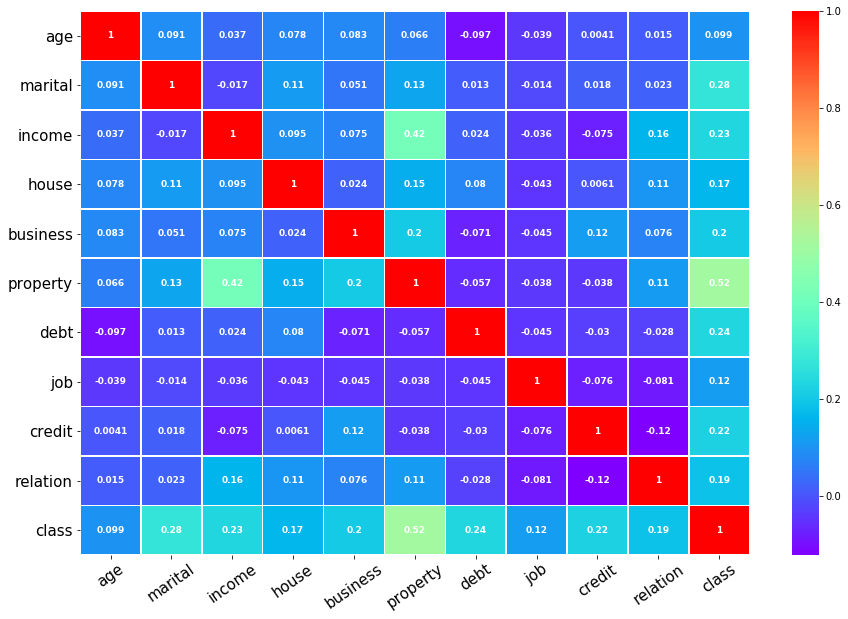

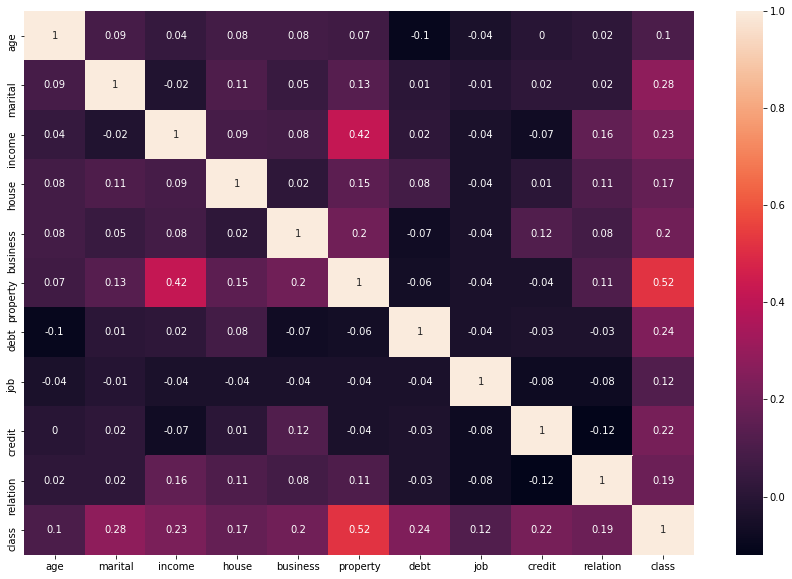

In [19]:
import seaborn as sns
corr = df.corr()#计算各变量的相关性系数
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'white'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()
r=df.corr()#相关系数
r=r.round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=r,annot=True)

可以看到各变量之间的相关性比较小，所以不需要操作，一般相关系数大于0.6可以进行变量剔除。

In [20]:
Y = df['class']
X = df.iloc[:,1:11]#切片，row_slice = rows.iloc[0:2, 1:3]  # 取rows的0-1行，1-2列的元素
X.head()

,age,marital,income,house,business,property,debt,job,credit,relation
0,5,5,3,3,1,12,10,7,0,3
1,5,5,3,3,2,15,10,7,5,4
2,5,5,5,3,2,12,7,7,4,4
3,5,5,2,3,1,8,10,4,5,1
4,5,5,3,3,1,8,7,7,4,1


In [21]:
#归一化三种方法
#def MaxMinNormalization(X,Max,Min):
    #X = (X - Min) / (Max - Min);
    #return X
#def sigmoid(X,useStatus):
 #   if useStatus:
  #      return 1.0 / (1 + np.exp(-float(X)));
   # else:
    #    return float(X)
#def Z_ScoreNormalization(X,mu,sigma):
 #   X0 = (X - mu) / sigma;
  #  return X0

def normalization(x):
    _range = np.max(X) - np.min(X)
    return (X - np.min(X)) / _range
X0 = normalization(X)

X0.head()

,age,marital,income,house,business,property,debt,job,credit,relation
0,1.0,1.0,0.333333,1.0,0.0,0.727273,1.0,1.0,0.0,0.50
1,1.0,1.0,0.333333,1.0,0.5,1.000000,1.0,1.0,1.0,0.75
2,1.0,1.0,1.000000,1.0,0.5,0.727273,0.5,1.0,0.8,0.75
3,1.0,1.0,0.000000,1.0,0.0,0.363636,1.0,0.0,1.0,0.00
4,1.0,1.0,0.333333,1.0,0.0,0.363636,0.5,1.0,0.8,0.00


In [22]:
#归一化散点图?
#plt.scatter(X0[:,1],X0[:,0])
#plt.show()

In [23]:
#当因变量Y为2分类变量（或多分类变量时）可以用相应的logistic回归分析各个自变量对因变量的影响程度
X1=sm.add_constant(X0)
logit=sm.Logit(Y,X1)
result=logit.fit()
print(result.summary())
#直接通过返回结果中各变量的P值与0.05比较，来判定对应的解释变量的显著性，P<0.05则认为自变量具有统计学意义

Optimization terminated successfully.
         Current function value: 0.333376
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  540
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                           10
Date:                Sat, 29 May 2021   Pseudo R-squ.:                  0.5175
Time:                        15:40:32   Log-Likelihood:                -180.02
converged:                       True   LL-Null:                       -373.10
                                        LLR p-value:                 8.318e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8169      2.024     -9.790      0.000     -23.784     -15.850
age            1.6247      0.

信用评分卡主要使用的算法模型是逻辑回归。logistic模型客群变化的敏感度不如其他高复杂度模型，因此稳健更好，鲁棒性更强。另外，模型直观，系数含义好阐述、易理解，使用逻辑回归优点是可以得到一个变量之间的线性关系式和对应的特征权值，方便后面将其转成一一对应的分数形式。

In [24]:
#logistics训练
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.6,random_state=0)
model=LogisticRegression()
clf=model.fit(x_train,y_train)
print('测试成绩：{}'.format(clf.score(x_test,y_test)))
 

测试成绩：0.7561728395061729


In [25]:
coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到
coe

array([[-0.41043534,  0.31672185, -0.1038061 , -1.18050113, -0.05683769,
         0.39525293,  0.16704703, -0.04890972,  0.37715501,  0.36611239]])

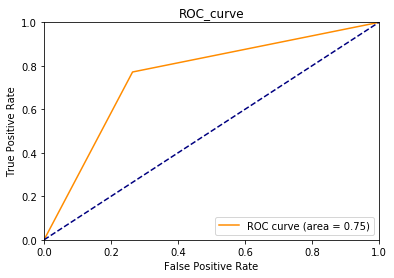

In [26]:
y_pred=clf.predict(x_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
roc_auc

0.7537267080745342

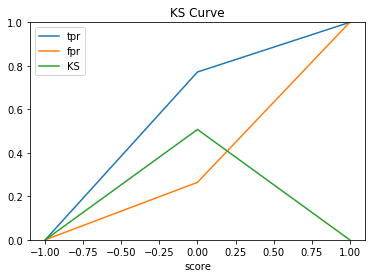

<Figure size 1440x1440 with 0 Axes>

In [28]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

In [29]:
max(tpr-fpr)#K-s值

0.5074534161490682

神经网络模型

In [33]:
#建立简单的网格搜索，寻找F1_score最高的参数
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
scaler1=StandardScaler()
scaler1.fit(X_trainval)
X_train1_scaled=scaler1.transform(X_trainval)
X_traintest_scaled=scaler1.transform(X_traintest)#预处理
bestf1=0
for solver in ["lbfgs","sgd","adam"]:
    for hidden_layer_sizes in [5,6,7,8,9,10,11,12,13,14,15,20,30,40,50,100,(10,5),(10,10),(15,5),(15,15)]:
        mlp=MLPClassifier(solver=solver,activation="logistic",random_state=0,hidden_layer_sizes=hidden_layer_sizes,max_iter=500).fit(X_train1_scaled,y_train1)
        mlp_pre=mlp.predict(X_traintest_scaled)
        confusion=confusion_matrix(y_traintest,mlp_pre)
        f1score=f1_score(y_traintest,mlp_pre)
        if (f1score) > bestf1:
            bestf1=f1score
            best_parameters={"solver":solver,"hidden_layer_sizes":hidden_layer_sizes}
print("bestf1:{}".format(bestf1))
print("best_parameters:{}".format(best_parameters))

NameError: name 'X_traintest' is not defined

In [ ]:
#数据预处理
scaler1=StandardScaler()
scaler1.fit(X_trainval)
X_train1_scaled=scaler1.transform(X_trainval)
X_traintest_scaled=scaler1.transform(X_traintestb)
X_test_scaled1=scaler1.transform(X_testb)
#建立MLP
mlp=MLPClassifier(solver="sgd",activation="logistic",random_state=0,hidden_layer_sizes=(6),max_iter=500).fit(X_train1_scaled,y_trainval)
#用选好的参数来预测训练集
mlp_pre=mlp.predict(X_test_scaled1)
confusion=confusion_matrix(y_test,mlp_pre)#混淆矩阵
plt.figure(figsize=(12,6))#设置画布的尺寸
print("训练集的分数：{:.5f}".format(mlp.score(X_train1_scaled,y_trainval)))
print("测试集的分数：{:.5f}".format(mlp.score(X_test_scaled1,y_test)))
print("混淆矩阵:\n{}".format(confusion))
print("评分表:\n{}".format(classification_report(y_test,mlp_pre)))

from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from pandas import Series

fpr,tpr,thresholds=roc_curve(y_test,mlp.predict_proba(X_test_scaled1)[:,1])
plt.subplot(1,2,1)
plt.plot(fpr,tpr,label="Roc curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],"o",markersize=10,label="threshold zero",fillstyle="none",c="k",mew=2)
plt.legend(loc=4)
maxks=max(tpr-fpr)
plt.subplot(1,2,2)
xx=(1+np.array(range(tpr.size)))/tpr.size
ks=tpr-fpr
plt.plot(xx,ks,label="KS")
plt.plot(xx,tpr,label="tpr")
plt.plot(xx,fpr,label="fpr")
plt.legend(loc=4)
print("AUC面积：{:.4f}".format(roc_auc_score(y_test,mlp.predict_proba(X_test_scaled1)[:,1])))
print("ks值:{:.4f}".format(maxks))

#过程中出现Found input variables with inconsistent numbers of samples: [390, 459]和operands could not be broadcast together with shapes错误
#均为x，y维度不同错误，调整后成功

In [ ]:
X_trainvalb,X_testb,y_trainvalb,y_test=train_test_split(X,Y,test_size=0.15,random_state=0)#将数据打乱划分为训练集+验证集  和测试集
X_trainval,X_traintestb,X_trainval,y_traintest=train_test_split(X_trainvalb,y_trainvalb,test_size=0.15,random_state=0)#将数据打乱划分为训练集+验证集
print("训练集+验证集正例的占比：",round(y_trainval.sum()/y_trainval.count(),4))
print("测试集正例的占比：",round(y_test.sum()/y_test.count(),4))
#X_test=X_testb.iloc[:,1:]#X_test是测试集的变量
#X_traintest=X_traintestb.iloc[:,1:]#X_traintest是验证集的变量们
X_trainvalb.head()
X_trainval0=y_trainvalb[y_trainvalb==0]
X_trainval1=y_trainvalb[y_trainvalb==1]#训练集中的坏样本
m=X_trainval0.shape[0]
X_trainval0=X_trainval0.reset_index(drop=True)#重置索引

print("训练集中类别为0的数量:{}".format(m))
print("训练集中类别为1的数量:{}".format(X_trainval1.shape[0]))
print("总训练集的数量:{}".format(X_trainval.shape[0]))
print("验证集的数量:{}".format(X_traintest.shape[0]))
print("测试集的数量:{}".format(X_test.shape[0]))

In [ ]:
#（test维度）
#X_traintestb.head()
lens()

In [ ]:
plt.scatter(X_trainval,X_trainval)